In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('../../../dataset/letterdata.csv')

In [3]:
raw_data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
raw_data.dtypes

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

In [5]:
raw_data.shape

(20000, 17)

In [6]:
raw_data.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [7]:
raw_data.isna().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [8]:
df = raw_data.copy()

In [9]:
x = np.array(df)[:, 1:16]
y = np.array(df['letter'])

In [10]:
xtrain = x[:16000]
xtest = x[16001:]
ytrain = y[:16000]
ytest = y[16001:]

### Build SVM Model

In [13]:
from sklearn.svm import SVC

In [14]:
model = SVC(C=3)
model.fit(xtrain, ytrain)

SVC(C=3)

In [15]:
ypred = model.predict(xtest)

In [16]:
ypred

array(['N', 'V', 'I', ..., 'T', 'S', 'A'], dtype=object)

In [17]:
model.score(xtest, ytest)

0.927231807951988

In [18]:
ygrid = np.column_stack([ytest, ypred])

In [19]:
ygrid

array([['N', 'N'],
       ['V', 'V'],
       ['I', 'I'],
       ...,
       ['T', 'T'],
       ['S', 'S'],
       ['A', 'A']], dtype=object)

In [20]:
import string

letter = list(string.ascii_uppercase[0:26])
pletter = ['Predicted ' + s for s in letter]

In [21]:
from sklearn import metrics

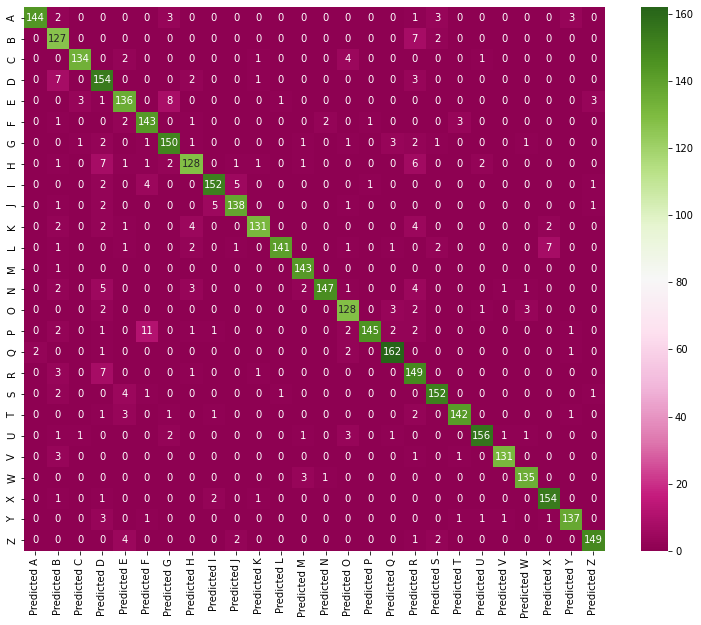

In [22]:
cm = metrics.confusion_matrix(ytest, ypred, labels=letter)
df_cm = pd.DataFrame(cm, index=letter, columns=pletter)

plt.figure(figsize=(13, 10))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='PiYG')
plt.show()